In [106]:
#! -*- coding: utf-8 -*-
import random
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.externals import joblib
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
plt.style.use('ggplot')
%matplotlib inline

In [44]:
# get data
#file = open('/home/howie/code/python/frame/BJData.txt').read()
#raw_data = file.strip().split('\n')
#header = raw_data[0].strip().split('\t')
#data = np.array([x.strip().split('\t') for x in raw_data[1:]])

df = pd.read_csv('/home/howie/code/python/frame/BJData.txt', delimiter='\t')
df.head()

,district,type,rt1,rt2,rt3,rt4,rt5,rt6,rt7,price,...,attraction,building,busstop,community,mall,primaryschool,restaurant,secondaryschool,university,deltausers
0,东城区,纯住宅,1,1,1,1,1,0,1,54945,...,2,7,2,30,0,1,33,1,0,-124
1,朝阳区,写字楼,1,1,1,1,1,0,1,NaN,...,1,1,2,17,0,1,26,1,0,-106
2,朝阳区,写字楼,1,1,1,1,1,0,0,NaN,...,1,9,2,20,2,0,46,1,0,-227
3,东城区,纯住宅,0,1,1,1,1,1,0,49000,...,1,7,3,57,0,1,14,0,0,-41
4,东城区,商住两用,1,1,0,1,1,1,1,42000,...,2,2,2,67,0,2,3,0,0,-26


In [45]:
# data preprocessing
df = df.dropna()
le = preprocessing.LabelEncoder()
df['district'] = le.fit_transform(df['district'])
df['type'] = le.fit_transform(df['type'])
df.head()

,district,type,rt1,rt2,rt3,rt4,rt5,rt6,rt7,price,...,attraction,building,busstop,community,mall,primaryschool,restaurant,secondaryschool,university,deltausers
0,0,3,1,1,1,1,1,0,1,54945,...,2,7,2,30,0,1,33,1,0,-124
3,0,3,0,1,1,1,1,1,0,49000,...,1,7,3,57,0,1,14,0,0,-41
4,0,2,1,1,0,1,1,1,1,42000,...,2,2,2,67,0,2,3,0,0,-26
6,4,2,1,1,1,1,1,0,0,52000,...,1,5,3,50,0,1,24,1,0,-47
7,0,2,1,1,1,1,0,1,1,65000,...,5,8,5,6,0,0,48,0,0,-74


In [97]:
## XGBoost model
'''
y = df['deltausers']
X = df[list(set(df.columns) - set(['deltausers']))]
rng = np.random.RandomState(31337)
kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=rng)


X2 = np.array(X)
y2 = np.array(y)
kf2 = KFold(y2.shape[0], n_folds=2, shuffle=True, random_state=rng)
print X2.shape, y2.shape
for train_index, test_index in kf2:
    xgb_model = xgb.XGBClassifier().fit(X2[train_index],y2[train_index])
    predictions = xgb_model.predict(X2[test_index])
'''
mat = np.array(df)
headers = list(df.columns)
X = mat[:, :-1]
y = mat[:, -1]
rng = np.random.RandomState(31337)
kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=rng)

xgb_model = xgb.XGBRegressor().fit(X, y)

'''
for train_index, test_index in kf:
    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    print predictions
'''

'\nfor train_index, test_index in kf:\n    xgb_model = xgb.XGBRegressor().fit(X[train_index],y[train_index])\n    predictions = xgb_model.predict(X[test_index])\n    print predictions\n'

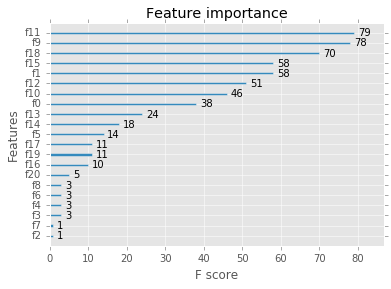

In [117]:
xgb.plot_importance(xgb_model)
plt.figure(figsize=(12,10))
plt.show()